# Modelleren: Het verloop van een chemische reactie

## Aspirine

In een waterige oplossing wordt aspirine (acetylsalicylzuur) gehydrolyseerd tot salicylzuur en azijnzuur. Met deze reactie is een reactiesnelheidsconstante $k\,\left[\text{l}\,\text{mol}^{-1} \text{h}^{-1}\right]$ geassocieerd. We wensen nu te modelleren hoe snel aspirine wordt afgebroken in waterige omgevingen in het menselijk lichaam.

<img src="figs/aspirineAfbraakII.png" alt="Drawing" style="width: 600px;"/>

In [Les 3](./Les3Thermodynamica.ipynb) maakten we kennis met de wet der massawerking, die een uitspraak doet over de snelheid waarmee elementaire reacties doorgaan. 

Beschouwen we een algemene, elementaire chemische reactie

\begin{equation}
\sum_{i=1}^{\alpha} a_i A_i \rightarrow \sum_{j=1}^{\beta} b_j B_j,
\end{equation}

waar $\alpha$ reactanten $A_i$, waarmee elk een stoichiometrische coëfficiënt $a_i$ wordt geassocieerd, omgezet worden tot $\beta$ reactieproducten $B_j$, met stoichiometrische coëfficiënt $b_j$. 

Wanneer deze reactie doorgaat in een perfect gemengde oplossing, wordt de reactiesnelheid $r$ gegeven door:

\begin{alignat}{4}
r &= &-\frac{1}{a_1} \frac{d[A_1]}{dt} &= -&\frac{1}{a_2} \frac{d[A_2]}{dt} &= \dots &= -&\frac{1}{a_\beta} \frac{d[A_\alpha]}{dt} \nonumber \\
&= &\frac{1}{b_1} \frac{d[B_1]}{dt} &= &\frac{1}{b_2} \frac{d[B_2]}{dt} &= \dots &= &\frac{1}{b_\alpha} \frac{d[B_\beta]}{dt} \nonumber \\
&= & k \prod_{i=1}^{\alpha} [A_i]^{a_{i}}, & &
\label{eq:reactiesnelheid}
\end{alignat}

met de concentraties aan molecules $A_i$ en $B_j$ in de oplossing genoteerd als $[A_i]$ en $[B_j]$, en $k$ de reactiesnelheidsconstante. De laatste gelijkheid wordt *de wet der massawerking* genoemd. De term $\prod_{i=1}^{\alpha} [A_i]^{a_{i}}$ is gerelateerd aan de kans dat de relevante reactanten tegen elkaar botsen in de oplossing, terwijl $k$ gerelateerd is aan de kans dat deze botsing effectief ook een reactie oplevert.


#### Opgave

Beschouw een perfect gemengde oplossing, van volume $V\,[l]$, waarin zich een hoeveelheid aspirine, $[A]\,[\text{mol} \, \text{l}^{-1}]$, bevindt. Schrijf de differentiaalvergelijkingen neer die de verandering van $[A]$ door toedoen van bovenstaande hydrolyse beschrijven. Onderstel dat de wet der massawerking opgaat, dat de volumewijziging door de reacties verwaarloosbaar is ten opzichte van $V$, en dat er zo veel water aanwezig is, dat $[H_2 O]$ als constant kan worden beschouwd. 

#### Oplossing

We vinden dat

$$
\begin{align}
\dfrac{d \left(V [A] \right)}{d t} &= -k [A] [H_2 O] V \\
\Leftrightarrow V \dfrac{d [A]}{d t} &= -k [A] [H_2 O] V \\
\Leftrightarrow \dfrac{d [A]}{d t} &= -k [A] [H_2 O].
\end{align}
$$

Daar we de concentratie $[H_2 O]$ als constant kunnen beschouwen, hebben we geen tweede vergelijking nodig die $[H_2 O]$ beschrijft. Bovenstaande vergelijking levert dus alle informatie die we nodig hebben om de verandering van $[A]$ doorheen de tijd te modelleren. Bovendien kunnen we de vergelijking vereenvoudigen door een nieuwe constante $k_c \equiv k [H_2 O]$ te introduceren, zodat we krijgen

$$
\dfrac{d [A]}{d t} = -k_c [A].
$$

#### Opgave

Los bovenstaande vergelijking analytisch op, met de methodes uit [Les 1](./Les1.ipynb).

#### Oplossing

$$
\begin{align}
\dfrac{d [A]}{d t}&=-k_c [A]\\
\Leftrightarrow \dfrac{d [A] }{[A]}&=-k_c d t \\
\Leftrightarrow \int \dfrac{d [A] }{[A]}&=\int -k_c d t\\
\Leftrightarrow \ln([A]) &= -k_c t + c\\
\Leftrightarrow [A] &= e^{-k_c t + c} \\
 &= e^c e^{-k t}\\
 &= c^{'} e^{-k_c t}
\end{align}
$$

Stel nu dat de concentratie $[A]$ op tijdstip nul gegeven wordt door $[A](t=0)=A_0$, en combineren we met bovenstaande vergelijking, dan vinden we:

$$
\begin{align}
A_0 &= c^{'} e^{-k_c 0} \\
&= c^{'}
\end{align}
$$

#### Opgave

Controleer of $[A] = A_0 e^{-k_c t}$ inderdaad een oplossing is.

Met behulp van de programmeertaal Python kunnen we nu deze oplossing gaan uittekenen. Hiertoe importeren we eerst enkele software-bibliotheken die dit mogelijk maken. Om een blok Python code uit te voeren, klikken we in het blok, en drukken we vervolgens de toetsen shift+enter in. 

In [1]:
# General Purpose
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

We kunnen de oplossing uittekenen aan de hand van onderstaande code. Neem de code door, en lees de commentaren (#), om te begrijpen wat er aan de hand is.

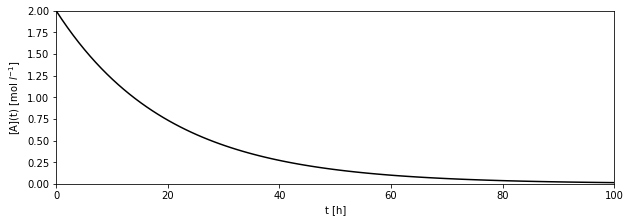

In [2]:
A0=2                              #[mol/l]
kc=0.05                           #[l/mol/h]

def f(t):                         #we maken een functie van t waarin de oplossing zit
    return A0 * np.exp(-kc*t)

tijd = np.linspace(0,100,100)     #we maken een vector met tijdstippen, [0,1,2,3,4,...,100]
oplossing = f(tijd)               #we passen de functie f(t) toe op elk van de tijdstippen [0,1,2,3,4,...,100]

plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(tijd, oplossing, 'k')    #we zetten de oplossing uit tegen de tijd
plt.xlim(0,100)
plt.ylim(0,2)
plt.xlabel('t [h]')
plt.ylabel('[A](t) [mol $l^{-1}$]')
plt.show()

#### Opgave

Pas in vorig codeblok de waarde van de initiële conditie aan, en voer opnieuw uit.

Onderstaande animatie geeft ons de kans het effect van de initiële conditie en de reactiesnelheidsconstante te onderzoeken.

In [3]:
def aspInt(A0,kc):

    def f(t):
        return A0 * np.exp(-kc*t)

    tijd = np.linspace(0,100,100)

    plt.figure(figsize=(10,7))
    plt.subplot(211)
    plt.plot(tijd, f(tijd), 'k')
    plt.xlim(0,100)
    plt.ylim(0,2)
    plt.xlabel('t [h]')
    plt.ylabel('[A](t) [mol l$^{-1}$]')
    plt.show()
    
interact(aspInt, A0=FloatSlider(min=0, max=3, step=0.1, value=1, description='$A_0$ [mol/l]', style=style, layout=slider_layout),
               kc=FloatSlider(min=0, max=0.1, step=0.01, value=0.05, description='$k_c$ [mol/l/h]', style=style, layout=slider_layout)
               );

interactive(children=(FloatSlider(value=1.0, description='$A_0$ [mol/l]', layout=Layout(width='99%'), max=3.0,…

#### Opgave

Hoe berekent men op basis van $[A]$ de concentratie salicylzuur, $[S]$, en azijnzuur, $[Ac]$, in de oplossing?

#### Opgave

Hoe lang duurt het om de helft van de aspirine te hydrolyseren?

## Enzymatische afbraak aspirine

We uit bovenstaande analyse kunnen concluderen dat de aspirine traag wordt gehydrolyseerd in het lichaam. Dit spreekt klinische testen echter tegen. Dit wordt verklaard door de aanwezigheid van het enzym Acetylsalicylate deacetylase, dat de hydrolysatiereactie sterk versneld.

De interactie tussen het enzym, $E$, en aspirine, $A$, wordt beschreven door onderstaande reactie.

$$\require{mhchem}$$   
$$
\ce{A + E<=>[k_f][k_r] A E ->[k_{cat}] S + E}
$$

Het enzyme vormt samen met de aspirine een complex, $AE$, dat vervolgens in salicylzuur, $S$, en het enzyme, $E$, kan worden omgezet.

#### Opgave

Naast de originele hydrolysatie reactie uit vorige sectie, wordt aspirine nu ook omgezet door het enzyme. Stel de differentiaalvergelijkingen op die het mogelijk maken de concentratie salicylzuur, $[S]$, te modelleren. Onderstel opnieuw dat de waterige oplossing perfect gemengt is, dat het volume $V$ ondanks de reacties ongeveer constant blijft, en dat de reactiesnelheden door de wet der massawerking gegeven worden.

#### Oplossing

$$
\begin{align}
\dfrac{d [A]}{d t} &= - k_c [A] - k_f [A] [E] + k_r [AE] \\
\dfrac{d [E]}{d t} &= - k_f [A] [E] + k_r [AE] + k_{cat} [AE] \\
\dfrac{d [AE]}{d t} &= k_f [A] [E] - k_r [AE] - k_{cat} [AE] \\
\dfrac{d [S]}{d t} &= k_c [A] + k_{cat} [AE]
\end{align}
$$

Om het verloop van de concentratie $[S]$ te weten te komen, is het nodig bovenstaand stelsel vergelijkingen op te lossen. We stellen vast dat het een hele opgave wordt bovenstaand stelsel van een analytische oplossing te voorzien. In het algemeen is het zo dat het onmogelijk is een analytische oplossing te vinden voor de meeste niet-lineaire differentiaalvergelijkingen. Om toch een idee te krijgen van het verloop van $[S]$, kunnen we met behulp van een computer een numerieke benadering van de ongekende analytische oplossing berekenen. We voeren hiertoe onderstaand blok code uit.

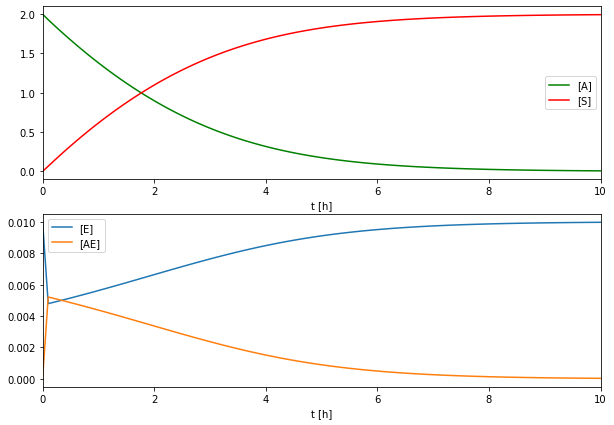

In [4]:
a0=2                           #ingeven initiële condities
e0=0.01
ae0=0
s0=0
init=[a0,e0,ae0,s0]            #initiële condities in vector formaat

                               #ingeven reactiesnelheidsconstanten
kc=0.05                        #[l/mol/h]
kf=62                          #[l/mol/h]
kr=0.1                         #[1/h]
kcat=110                       #[1/h]


def dXdt(x,tijd):              #functie die de afgeleiden berekend voor de toestanden x=[a,e,ae,s] op een tijdstip tijd
    a,e,ae,s = x
    dxdt=[-kc*a-kf*a*e+kr*ae,  #de rechterleden van het stelsel differentiaalvergelijkingen
         -kf*a*e+kr*ae+kcat*ae,
         kf*a*e-kr*ae-kcat*ae,
         kcat*ae+kc*a]
    return dxdt



tijd = np.linspace(0,10,100)   #tijdstippen waarop we de toestanden willen berekenen, tijd=[0,0.1,0.2,...,10]

oplossing = odeint(dXdt,init,tijd) #de functie odeint berekent de numerieke benadering van de analytische oplossing, 
                                   #voor initiële condities init, op de tijdstippen tijd.


plt.figure(figsize=(10,7))     #de oplossing uittekenen
plt.subplot(2,1,1)
plt.plot(tijd, oplossing[:,0],'g-',label='[A]')
plt.plot(tijd, oplossing[:,3],'r-',label='[S]')
plt.legend()
plt.xlim(0,10)
plt.xlabel('t [h]')
plt.subplot(2,1,2)
plt.plot(tijd, oplossing[:,1],label='[E]')
plt.plot(tijd, oplossing[:,2],label='[AE]')
plt.legend()
plt.xlim(0,10)
plt.xlabel('t [h]')
plt.show()

#### Opgave

Bestudeer bovenstaande figuur. Hoe lang duurt het nu om de helft van de aspirine af te breken?

Onderstaande animatie laat ons toe de invloed van de initiële hoeveelheid $[A](t=0)$ en $[E](t=0)$ te onderzoeken.

In [5]:
def enzyme(a0,e0):          
    ae0=0
    s0=0
    init=[a0,e0,ae0,s0]            #initiële condities in vector formaat

                                   #ingeven reactiesnelheidsconstanten
    kc=0.05                         #[l/mol/h]
    kf=62                          #[l/mol/h]
    kr=0.1                         #[1/h]
    kcat=110                       #[1/h]


    def dXdt(x,tijd):              #functie die de afgeleiden berekend voor de toestanden x=[a,e,ae,s] op een tijdstip tijd
        a,e,ae,s = x
        dxdt=[-kc*a-kf*a*e+kr*ae,  #de rechterleden van het stelsel differentiaalvergelijkingen
             -kf*a*e+kr*ae+kcat*ae,
             kf*a*e-kr*ae-kcat*ae,
             kcat*ae+kc*a]
        return dxdt



    tijd = np.linspace(0,10,100)   #tijdstippen waarop we de toestanden willen berekenen, tijd=[0,0.1,0.2,...,10]

    oplossing = odeint(dXdt,init,tijd) #de functie odeint berekent de numerieke benadering van de analytische oplossing, 
                                       #voor initiële condities init, op de tijdstippen tijd.


    plt.figure(figsize=(10,7))     #de oplossing uittekenen
    plt.subplot(2,1,1)
    plt.plot(tijd, oplossing[:,0],'g-',label='[A]')
    plt.plot(tijd, oplossing[:,3],'r-',label='[S]')
    plt.legend()
    plt.xlim(0,10)
    plt.ylim(0,3)
    plt.xlabel('t [h]')
    plt.subplot(2,1,2)
    plt.plot(tijd, oplossing[:,1],label='[E]')
    plt.plot(tijd, oplossing[:,2],label='[AE]')
    plt.legend()
    plt.xlim(0,10)
    plt.ylim(0,0.05)
    plt.xlabel('t [h]')
    plt.show()
    
interact(enzyme, a0=FloatSlider(min=0, max=3, step=0.1, value=2, description='$A_0$ [mol/l]', style=style, layout=slider_layout),
               e0=FloatSlider(min=0, max=0.05, step=0.005, value=0.01, description='$E_0$ [mol/l]', style=style, layout=slider_layout)
               );

interactive(children=(FloatSlider(value=2.0, description='$A_0$ [mol/l]', layout=Layout(width='99%'), max=3.0,…